In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [71]:
df=pd.read_csv('wines_SPA.csv')

In [72]:
df.shape

(7500, 11)

In [73]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [74]:
df.sample(15)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
4694,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,NaN,NaN
1220,Volver,Alicante Bouschet by Tarima,2017,4.3,658,Espana,Alicante,17.15,Red,4.0,3.0
6540,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
1490,Bodega Elias Mora,Toro Gran Elias Mora,2014,4.3,108,Espana,Toro,33.50,Toro Red,5.0,3.0
2153,Sierra Cantabria,Coleccion Privada,2012,4.2,420,Espana,Rioja,28.30,Rioja Red,4.0,3.0
2270,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
3140,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
5648,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
1538,De Moya,Sofia,2017,4.3,82,Espana,Valencia,20.50,Red,NaN,NaN
6115,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [76]:
df['year']=df['year'].replace('N.V.', pd.NA)
df['year']=df['year'].fillna(df['year'].mode()[0])
df['year']=df['year'].astype(int)

In [77]:
df.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [78]:
df.describe()

,year,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,2013.399333,4.254933,451.109067,60.095822,4.158427,2.946612
std,6.821921,0.118029,723.001856,150.356676,0.583352,0.248202
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000
25%,2011.000000,4.200000,389.000000,18.900000,4.000000,3.000000
50%,2015.000000,4.200000,404.000000,28.530000,4.000000,3.000000
75%,2017.000000,4.200000,415.000000,51.350000,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [79]:
df.duplicated().sum()

np.int64(5452)

In [80]:
df=df.drop_duplicates()

In [81]:
df.loc[:,'acidity']=df.groupby('wine')['acidity'].transform(lambda x:x.fillna(x.median()))

In [82]:
df.loc[:,'body']=df.groupby('wine')['body'].transform(lambda x:x.fillna(x.median()))

In [83]:
df.loc[:,'acidity']=df['acidity'].fillna(df['acidity'].mean())

In [84]:
df.loc[:,'body']=df['body'].fillna(df['body'].mean())

In [85]:
df=df.dropna(subset=['year'])

In [86]:
df.loc[:,'type'] = df.groupby('wine')['type'].transform(lambda x:x.fillna(x.mode()))


In [87]:
df=df.dropna(subset=['type'])

In [88]:
df.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


In [89]:
df = df.drop(columns=['country'])

In [90]:
df['type'].nunique()

21

In [91]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [92]:
df.sample(5)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
234,Dominio de Pingus,Pingus,2000,4.6,122,Ribera del Duero,1503.00,11,5.0,3.0
904,Bodega Contador (Benjamin Romeo),La Cueva del Contador Rioja,2004,4.4,94,Rioja,90.00,12,4.0,3.0
1492,Arinzano,Gran Vino Blanco,2004,4.3,108,Arinzano,52.95,3,4.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,11,5.0,3.0
678,Atalaya,Alaya Tierra (Old Vines Vieilles Vignes),2018,4.4,1158,Almansa,24.80,4,5.0,3.0


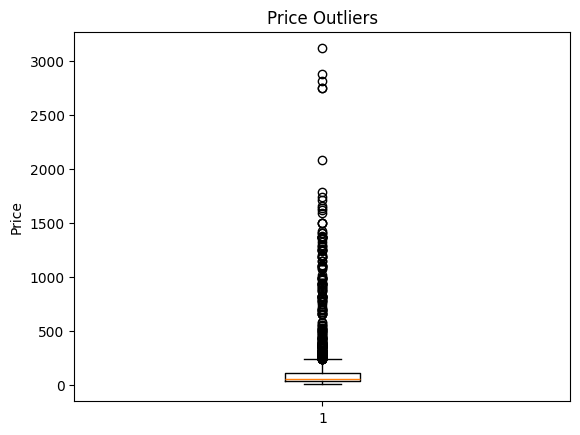

In [93]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()

In [106]:
lower_percentile=0.1
upper_percentile=0.9
lower_bound=df['price'].quantile(lower_percentile)
upper_bound=df['price'].quantile(upper_percentile)

In [107]:
df['price']=np.where(df['price']>upper_bound,upper_bound,df['price'])
df['price']=np.where(df['price']<lower_bound,lower_bound,df['price'])

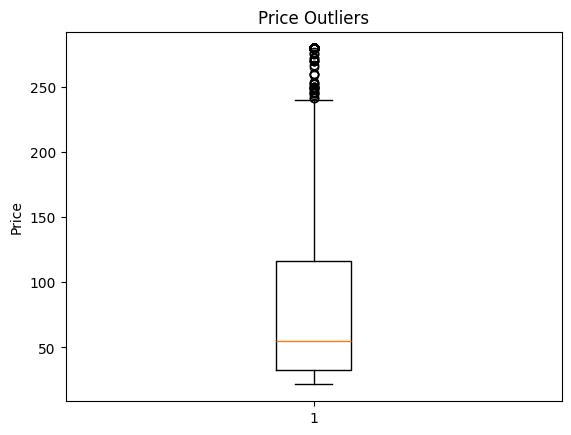

In [108]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()